<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/reuter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuter 
LSTM : 가장 멀리있는 곳 위치를 기억한다

Ags : 아규스 , 파라메터

## Datasets

In [1]:
import tensorflow as tf

* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)

결과: 
((8982,), (8982,), (2246,), (2246,))

In [2]:
(x_train, y_train),(x_test,y_test)= tf.keras.datasets.reuters.load_data(num_words=10000)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

* 50번째(특정부분)에 무엇이 있는지 확인하기

결과: 4 [1, 1479, 1197, ...]

단어 기준으로 언어를 숫자로 채워준다 

In [3]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


* input 넣으려니 datasize가 동일한지 컬럼의 갯수 확인하기

결과: (118, 90, 212)

사이즈가 다 다르네? -> 강제적으로 맞춰준다 -> 숫자일때 계산에 영향을 주지 않는 값 0 으로 패딩해준다

In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)

In [6]:
 len(pad_x_train[50]) # pad_x_train[50]

500

In [7]:
import numpy as np
# len(np.unique(y_train)) 
np.unique(y_train).shape

(46,)

## Make model

In [8]:
model = tf.keras.models.Sequential()

* Input layer

모든 (컬럼)사이즈, 데이터 사이즈는 동일해야 한다

```
Embedding(
  input_length=500,   인풋 데이터 사이즈 = 500 
  input_dim= 10000,   사전의 사이즈 정해줌 (차원의 기준)
   output_dim= 24,     백터 24차원으로 바꿈(연관관계있도록 만들어줌)  
  ) 
```

In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000 ,output_dim=24))

* Hidden layer

데이터를 플랫하게 만들어준다

```
model.add(tf.keras.layers.Flatten())
```


tf.keras.layers.LSTM( units, activation='tanh',return_sequences=False)

같은 layer에서 중간쯤 가면 맨 처음에 무슨단어를 넣었는지 까먹는다. 시간이 가도 처음에 뭐 넣엇는지 기억하게 만들자. 그러면 성능이 더 좋아지지 않겠느냐 해서 만들어짐
(플랫 대신해서 사용)

적용:

1.레이어 바로 앞 인배딩이 아웃풋 하는 사이즈와 동일해야 한다.(인배딩과 연결되는부분)

2.레이어 완전 연결방식이기 때문에 두번째 부턴 숫자 달라져도 된다.

In [12]:
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12,activation='tanh'))

* Output layer

np.unique(y_train) 유니크한 컬럼의 갯수의 결과 : (46,)

Dense는 유니크한 컬럼의 갯수가 들어간다.

activation은 dense가 3개 이상 이어서 softmax 사용

In [13]:
model.add(tf.keras.layers.Dense(46,activation='softmax'))

* Gadget

optimizer = adam 학습 잘 할 수 있게 기준을 만들어줌

loss = sparse_categorical_crossemtropy 수치(원핫인코딩 안하려면 이거씀-분류형인지도 알려줌)


In [14]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['acc'])

## Train

기존: 한 번 에폭에 55초 걸렷고, loss는 2.5907

model.fit(pad_x_train, y_train)

히든레이어에 LSTM 레이어 하나더 추가: 다섯번 에폭에 26초 걸렸고, loss는 2.4120 (에폭 최소 30은 돌려야한다)

model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3 , batch_size=128)

In [21]:
hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3 , batch_size=128)

Epoch 1/5
50/50 [==============================] - 26s 524ms/step - loss: 2.4129 - acc: 0.3510 - val_loss: 2.3819 - val_acc: 0.3532
Epoch 2/5
50/50 [==============================] - 26s 522ms/step - loss: 2.4125 - acc: 0.3510 - val_loss: 2.3821 - val_acc: 0.3532
Epoch 3/5
50/50 [==============================] - 26s 524ms/step - loss: 2.4125 - acc: 0.3510 - val_loss: 2.3818 - val_acc: 0.3532
Epoch 4/5
50/50 [==============================] - 26s 521ms/step - loss: 2.4125 - acc: 0.3510 - val_loss: 2.3822 - val_acc: 0.3532
Epoch 5/5
50/50 [==============================] - 26s 522ms/step - loss: 2.4120 - acc: 0.3510 - val_loss: 2.3824 - val_acc: 0.3532


## Evaluation

* x의 키워드를 만들고 y의 분류에 짝을 지어 준다.

1. 학습을 시켰던 데이터

기존: loss: 2.4045

LSTM 하나 더 추가, 에폭 5: loss: 2.4023

In [23]:
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 17s 62ms/step - loss: 2.4023 - acc: 0.3517


[2.4022889137268066, 0.351703405380249]

2. 학습 안시킨 데이터 전처리

In [24]:
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [25]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 63ms/step - loss: 2.4147 - acc: 0.3620


[2.4147167205810547, 0.36197686195373535]

* 1.과  2. 비교

 1. 17s 61ms/step - loss: 2.4023

 2.  4s 61ms/step - loss: 2.4147

  loss가 비슷하니 학습이 잘 됬구나 알 수 있다.

## Plot

In [26]:
import matplotlib.pyplot as plt

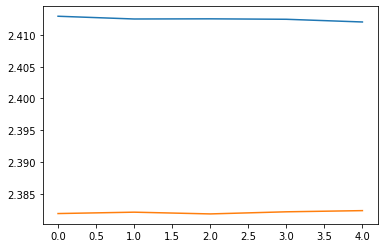

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

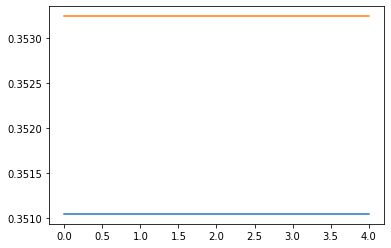

In [30]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()